## 1.6  Сплайн - аппроксимация

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import scipy

### Построение сглаживающего сплайна

#####  построение интерполяционного сплайна рассмотрено в разделе 1.1

In [2]:
def SplineCoefs (x, y, num_of_nodes, Xk, aplha):
    
    # calculation of cubic spline coefficients
    
    # x, y - data set
    # num_of_nodes - number of nodes for spline approximation
    # Xk - vector of x-values at the nodes
    # aplha - regularization parameter
    
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n,num_of_nodes+4)) # Matrix of basic functions
    
    RegAlpha = np.eye (num_of_nodes+4) * alpha     
        
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x) 
    
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

def SplineCoefsN (x, y, num_of_nodes, Xk, aplha):
    
    # calculation of NATURALE cubic spline coefficients
    
    # x, y - data set
    # num_of_nodes - number of nodes for spline approximation
    # Xk - vector of x-values at the nodes
    # aplha - regularization parameter
    
    n = len(x)
    e = np.eye (n)
    Phi = np.zeros ((n, num_of_nodes)) # Matrix of basic functions
    
    RegAlpha = np.eye (num_of_nodes) * alpha     
        
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)  
        
    PhiT = Phi.T
    G = PhiT @ Phi + RegAlpha
    z = PhiT @ y
    a = np.linalg.solve(G, z)
    
    return a

def SplineValues(a, x):
    
    # calculation of NATURALE spline values
    
    Phi = BasicFunctionsSpline (num_of_nodes, Xk, x)
    values = Phi@a
    
    return values

def SplineValuesN(a, x):
    
    # calculation of Natural cubic spline values
    
    Phi = BasicFunctionsSplineN (num_of_nodes, Xk, x)
    values = Phi@a
    
    return values

def BasicFunctionsSpline (num_of_nodes, Xk, x):
    
    # basic functions for cubic spline
    
    m = num_of_nodes + 4
    
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    
    #print (PhiFunArray.shape)
    
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x; PhiFunArray [:,2] = x**2; PhiFunArray [:,3] = x**3
    
    for k in range (0, num_of_nodes):
        PhiFunArray [:,k+4] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                PhiFunArray [i,k+4] = (x[i] - Xk[k])**3
    
    return PhiFunArray

def BasicFunctionsSplineN (num_of_nodes, Xk, x):
    
    # basic functions for NATURALE cubic spline
    
    m = num_of_nodes #+ 2
    
    PhiFunArray = np.zeros ((len(x), m)) # Matrix of basic functions
    
    Dkk = np.zeros ((len(x), m))
    Dk = np.zeros ((len(x), m))
    
    #print (PhiFunArray.shape)
    
    PhiFunArray [:,0] = 1 
    PhiFunArray [:,1] = x 
    
    for k in range (0, num_of_nodes):
        Dkk [:,k] = 0.
        for i in range (0, len(x)):
            if (x[i]>Xk[k]):
                Dkk [i,k] = (x[i] - Xk[k])**3
    
                    
    for k in range (0, num_of_nodes-1):
        Dk[:,k] = (Dkk [:,k] - Dkk [:,num_of_nodes-1])/(Xk[num_of_nodes-1]-Xk[k])
        
         
    for k in range (0, num_of_nodes-2):
        PhiFunArray [:,k+2] = Dk[:,k] - Dk[:,num_of_nodes-2]
    
           
    return PhiFunArray

### Пример 

0.3333333333333333 [-0.66666667 -0.33333333  0.          0.33333333  0.66666667]


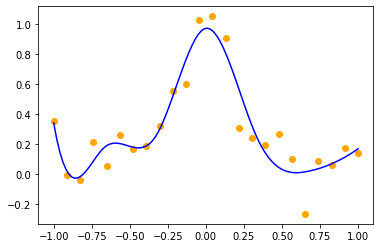

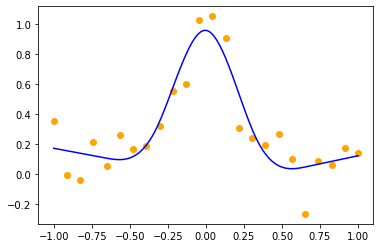

In [3]:
xleft = -1.0; xright = 1.0
n = 24
x = np.linspace(xleft,xright,n)
yf = 1./(1.+25.*x**2)

Delta = 0.1 * np.random.randn(len(x))
y = yf + Delta

num_of_nodes = 5

Xk = np.zeros (num_of_nodes)

dx = (xright - xleft)/(num_of_nodes+1)

for k in range (0, num_of_nodes):
    Xk[k] = xleft + dx*(k+1)
    
#Xk = np.sort(xleft + np.random.random(num_of_nodes)*(xright-xleft))
    
print (dx, Xk)

nplot = 100
xplot = np.linspace(xleft,xright,nplot)
yplot_exact = 1./(1.+25.*xplot**2)


alpha = 0.000

a = SplineCoefs (x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValues(a, xplot)

plt.plot (x, y, 'o', color = 'orange')
plt.plot (xplot, ySpline, color = 'blue')
#plt.plot (xplot, yplot_exact, color = 'red')
plt.figure()
     
alpha = 0.000

a = SplineCoefsN (x, y, num_of_nodes, Xk, alpha)

ySpline = SplineValuesN(a, xplot)

plt.plot (x, y, 'o', color = 'orange')
plt.plot (xplot, ySpline,'blue' )
#plt.plot (xplot, yplot_exact, color = 'red')

